In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import pickle
import sys
from pathlib import Path


from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
)

sys.path.append(os.path.dirname(os.getcwd()))
from tools.utils import PERIODIC_TABLE_INFO, extract_structure_elements, load_json

In [2]:
PLOT_DIR  = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "plots/analysis/")

# Load Periodic Table Information

In [3]:
for elt in PERIODIC_TABLE_INFO:
       ELEMENT_INFO = PERIODIC_TABLE_INFO[elt]
       ELEMENT_INFO['MAPE'] = 0

In [4]:
lanthanides_ordered = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']

# Load Model with Atomic Encoding

In [5]:
TARGET_NAME = "delta_E/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [6]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models/", TARGET_NAME, ENCODING_NAME
)

In [7]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [8]:
X_DATA_NAME = "X_Structure gen..csv"
y_DATA_NAME = "y_Structure gen..csv"

In [9]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_DATA_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_DATA_NAME, index_col=0)

In [10]:
X_test.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,total_atoms
count,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000,53926.0,53926.000000,53926.000000,53926.0,53926.0,...,53926.000000,53926.000000,53926.000000,53926.000000,53926.0,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000
mean,244.199829,5.921559,56.750732,0.008104,0.014195,0.0,0.001382,0.010162,0.0,0.0,...,0.015772,0.009940,0.030060,0.005962,0.0,0.011692,0.010820,0.019786,0.020547,2.024144
std,89.386973,2.819707,23.755013,0.063137,0.083044,0.0,0.026246,0.070554,0.0,0.0,...,0.087391,0.069793,0.118855,0.054272,0.0,0.075560,0.072754,0.097477,0.099254,0.218418
min,100.000000,2.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
25%,180.000000,4.000000,35.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,260.000000,6.000000,55.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
75%,340.000000,8.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
max,380.000000,10.000000,100.000000,0.500000,0.500000,0.0,0.500000,0.500000,0.0,0.0,...,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,4.000000


# Compute MAPE per element

In [11]:
y_pred = pd.Series(model.predict(X_test))
print(len(y_pred))

53926


In [12]:
for elt in PERIODIC_TABLE_INFO:
    elt_mask = X_test[elt].to_numpy().nonzero()[0]
    ELEMENT_INFO = PERIODIC_TABLE_INFO[elt]
    if len(elt_mask) == 0:
        print("NO OBSERVATIONS DETECTED: ", elt)
        mape = np.nan
    else:
        mape = mean_absolute_percentage_error(y_test.iloc[elt_mask], y_pred.iloc[elt_mask])
    ELEMENT_INFO['MAPE'] = mape

    

NO OBSERVATIONS DETECTED:  Ar
NO OBSERVATIONS DETECTED:  B
NO OBSERVATIONS DETECTED:  Ba
NO OBSERVATIONS DETECTED:  Cr
NO OBSERVATIONS DETECTED:  F
NO OBSERVATIONS DETECTED:  Ga
NO OBSERVATIONS DETECTED:  He
NO OBSERVATIONS DETECTED:  Hf
NO OBSERVATIONS DETECTED:  I
NO OBSERVATIONS DETECTED:  Kr
NO OBSERVATIONS DETECTED:  La
NO OBSERVATIONS DETECTED:  Ne
NO OBSERVATIONS DETECTED:  Ni
NO OBSERVATIONS DETECTED:  Pm
NO OBSERVATIONS DETECTED:  Po
NO OBSERVATIONS DETECTED:  Rn
NO OBSERVATIONS DETECTED:  Tb
NO OBSERVATIONS DETECTED:  Tc
NO OBSERVATIONS DETECTED:  Xe


# Visualize periodic table

In [13]:
labels = dict(color="MAPE")
T = np.empty((8, 18))*np.nan
for elt in PERIODIC_TABLE_INFO:
        ELEMENT_INFO = PERIODIC_TABLE_INFO[elt]
        if ELEMENT_INFO['PTC'] == 'Lant':
            j = lanthanides_ordered.index(elt) + 3
            i = 7
        else:
            i, j = ELEMENT_INFO['idx']
        T[i, j] = ELEMENT_INFO['MAPE']

fig = px.imshow(T,
                labels=labels,
                #color_continuous_scale='Bluered_r'
               )
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
for elt in PERIODIC_TABLE_INFO:
        ELEMENT_INFO = PERIODIC_TABLE_INFO[elt]
        if ELEMENT_INFO['PTC'] == 'Lant':
            j = lanthanides_ordered.index(elt) + 3
            i = 7
        else: 
            i, j = ELEMENT_INFO['idx']
        fig.add_annotation(
            x=j,
            y=i,
            text=elt,
            showarrow=False,
            font_size=14, font_color='white')
        
fig.add_annotation(
    x=2,
    y=7,
    text="*",
    showarrow=False,
    font_size=28, font_color='black')

fig.add_annotation(
    x=2,
    y=5,
    text="*",
    showarrow=False,
    font_size=28, font_color='black')

fig.update_layout({
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.show()

# Visualize Mape as a function of ∆E

In [14]:
single_mape_vals = np.array([mean_absolute_percentage_error([yy_test], [yy_pred]) for yy_test, yy_pred in zip(y_test['delta_E'], y_pred)])


In [15]:
labels = dict(y="$MAPE$", x="$\log(\Delta E)$")

fig = px.scatter(x=np.log(y_test['delta_E']),
                 y=single_mape_vals,
                labels=labels)
fig.show()

In [16]:
labels = dict(x="$MAPE \geq 100$")
fig = px.histogram(x=single_mape_vals[single_mape_vals >= 100],
                  labels=labels)
fig.show()

In [17]:
ranges = [(-20, -15), (-15, -10), (-10, -5), (-5, 0)]

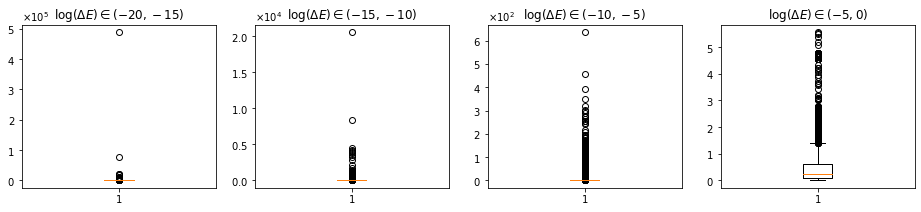

In [18]:

fig, ax = plt.subplots(1, len(ranges), sharey=False, figsize=(16,3))
for j, range_ in enumerate(ranges):
    lb, ub = range_
    mask = (np.log(y_test['delta_E']) > lb) & (np.log(y_test['delta_E']) <= ub)
    ax[j].boxplot(single_mape_vals[mask])
    ax[j].set_title(f"$\log(\Delta E) \in ({lb}, {ub})$")
    ax[j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
plt.savefig(PLOT_DIR + "boxplots_ranges.png")
plt.show()